In [15]:
# ----------------------------------------
# PROYECTO DE ANÁLISIS DE DATOS
# Riesgo Crediticio en el Perú (2018)
# Autor: Renato Cahuana Silva
# ----------------------------------------

# FASE 1: IMPORTACIÓN DE LIBRERÍAS
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Configuración de estilo de gráficos
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

In [18]:
# FASE 2: CARGA DE DATOS
df = pd.read_csv('D:/RENATO/Desktop/data/credit_risk_es.csv')  # Ajusta la ruta si es necesario

# FASE 3: EXPLORACIÓN INICIAL
print("✅ Dimensiones del dataset:", df.shape)
print("\n📌 Primeras filas:")
print(df.head())
print("\n📌 Información general:")
print(df.info())
print("\n📌 Valores nulos por columna:")
print(df.isnull().sum())


✅ Dimensiones del dataset: (207, 15)

📌 Primeras filas:
           distrito actividad_comercial tipo_de_vivienda       sexo  edad  \
0             AHUAC         DEPENDIENTE           PROPIA   FEMENINO    38   
1  HUAMANCACA CHICO         DEPENDIENTE           PROPIA  MASCULINO    39   
2           CHUPACA   COMERCIO FAMILIAR         FEMENINO   FEMENINO    42   
3           CHUPACA         DEPENDIENTE         FAMILIAR   FEMENINO    22   
4           CHUPACA            COMERCIO           PROPIA   FEMENINO    35   

  condicion_civil  num_hijos  monto_desembolsado  plazo_del_credito aval  \
0     CONVIVIENTE          2             2012.87                 12   NO   
1     CONVIVIENTE          1            45865.30                 48   NO   
2         SOLTERO          1             1007.44                 12   NO   
3         SOLTERO          0             2012.87                 12   SI   
4     CONVIVIENTE          2             1509.71                 12   NO   

  tipo_de_garantia  max_

In [19]:
# FASE 4: LIMPIEZA DE DATOS
# Eliminar duplicados
df.drop_duplicates(inplace=True)

# Eliminar filas con valores faltantes en columnas clave
df.dropna(subset=['segmentacion_riesgo', 'edad', 'monto_desembolsado'], inplace=True)

# FASE 5: ANÁLISIS DESCRIPTIVO
print("\n📊 Distribución por sexo:")
print(df['sexo'].value_counts())

print("\n📊 Estadísticas de edad y monto:")
print(df[['edad', 'monto_desembolsado']].describe())



📊 Distribución por sexo:
sexo
FEMENINO     110
MASCULINO     97
Name: count, dtype: int64

📊 Estadísticas de edad y monto:
             edad  monto_desembolsado
count  207.000000        2.070000e+02
mean    41.082126        1.880466e+04
std     10.972075        8.295253e+04
min     22.000000        3.008800e+02
25%     34.500000        1.509710e+03
50%     39.000000        3.019310e+03
75%     48.000000        1.003010e+04
max     68.000000        1.137732e+06


C:\Users\Renato\AppData\Local\Temp\ipykernel_14240\3275484719.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='segmentacion_riesgo', palette='Set2')


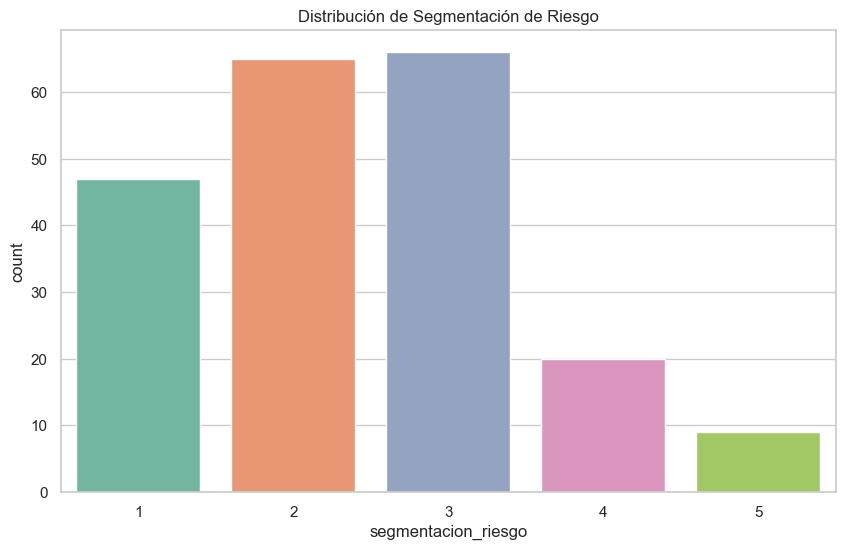

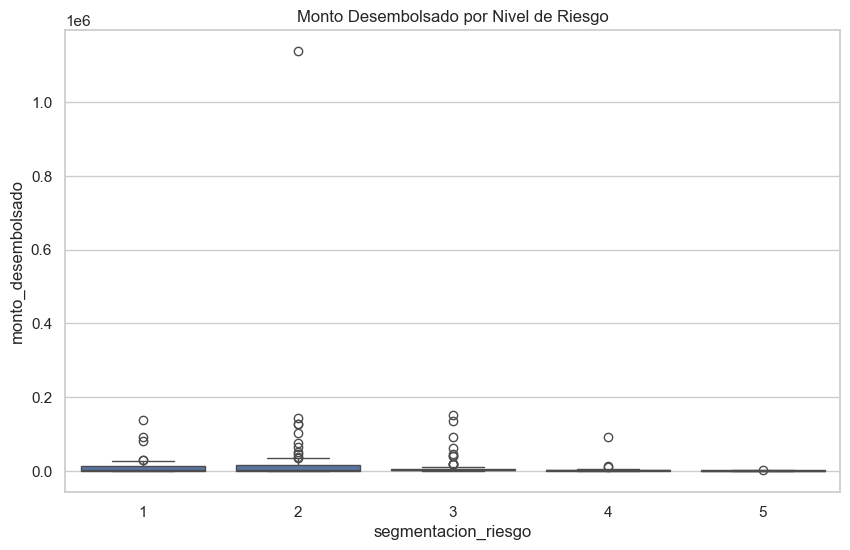

C:\Users\Renato\AppData\Local\Temp\ipykernel_14240\3275484719.py:14: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='segmentacion_riesgo', y='edad', ci=None)


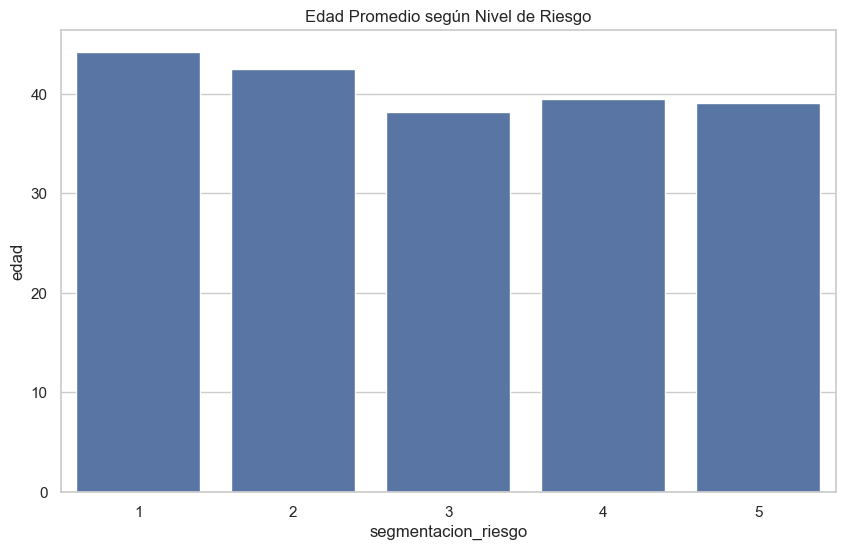

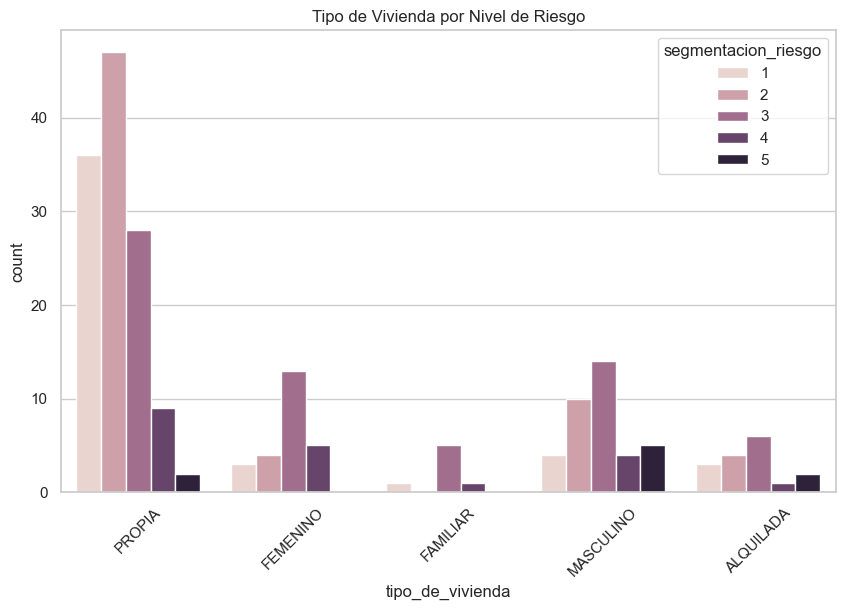

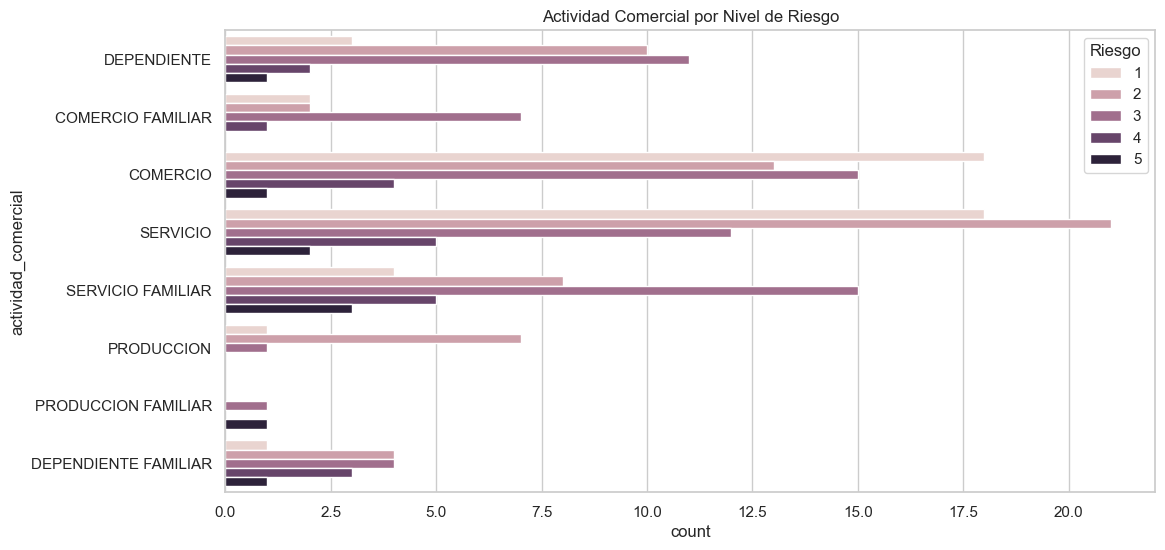

In [20]:
# FASE 6: VISUALIZACIONES EXPLORATORIAS

# Distribución de la variable objetivo
sns.countplot(data=df, x='segmentacion_riesgo', palette='Set2')
plt.title('Distribución de Segmentación de Riesgo')
plt.show()

# Monto desembolsado por riesgo
sns.boxplot(data=df, x='segmentacion_riesgo', y='monto_desembolsado')
plt.title('Monto Desembolsado por Nivel de Riesgo')
plt.show()

# Edad promedio por nivel de riesgo
sns.barplot(data=df, x='segmentacion_riesgo', y='edad', ci=None)
plt.title('Edad Promedio según Nivel de Riesgo')
plt.show()

# Tipo de vivienda vs riesgo
sns.countplot(data=df, x='tipo_de_vivienda', hue='segmentacion_riesgo')
plt.title('Tipo de Vivienda por Nivel de Riesgo')
plt.xticks(rotation=45)
plt.show()

# Actividad comercial vs riesgo
plt.figure(figsize=(12, 6))
sns.countplot(data=df, y='actividad_comercial', hue='segmentacion_riesgo')
plt.title('Actividad Comercial por Nivel de Riesgo')
plt.legend(title='Riesgo')
plt.show()


In [21]:
# FASE 7: PREPARACIÓN PARA EL MODELO

# Crear copia para modelar
df_model = df.copy()

# Codificar variables categóricas con one-hot encoding
cat_cols = ['sexo', 'tipo_de_vivienda', 'actividad_comercial', 'aval', 'tipo_de_garantia', 'condicion_civil']
df_model = pd.get_dummies(df_model, columns=cat_cols, drop_first=True)

# Codificar la variable objetivo
le = LabelEncoder()
df_model['segmentacion_riesgo'] = le.fit_transform(df_model['segmentacion_riesgo'])

# Eliminar columnas no necesarias para el modelo
df_model.drop(['distrito', 'calificacion_sistema'], axis=1, inplace=True)

# Separar X (features) e y (objetivo)
X = df_model.drop('segmentacion_riesgo', axis=1)
y = df_model['segmentacion_riesgo']

In [22]:
# FASE 8: DIVISIÓN DE DATOS Y ENTRENAMIENTO DEL MODELO

# Dividir los datos en entrenamiento y prueba (70% - 30%), estratificando por clase
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Entrenar un modelo de regresión logística
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Hacer predicciones
y_pred = model.predict(X_test)

c:\Users\Renato\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [23]:
# FASE 9: EVALUACIÓN DEL MODELO
print("\n📈 Reporte de clasificación:")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
print("\n🧩 Matriz de confusión:")
print(cm)


📈 Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.33      0.21      0.26        14
           1       0.35      0.60      0.44        20
           2       0.50      0.25      0.33        20
           3       0.62      0.83      0.71         6
           4       1.00      0.67      0.80         3

    accuracy                           0.43        63
   macro avg       0.56      0.51      0.51        63
weighted avg       0.45      0.43      0.41        63


🧩 Matriz de confusión:
[[ 3 10  1  0  0]
 [ 5 12  3  0  0]
 [ 1 12  5  2  0]
 [ 0  0  1  5  0]
 [ 0  0  0  1  2]]


In [ ]:
# FASE 10: CONCLUSIONES
print("\n✅ CONCLUSIONES:")
print("- El análisis muestra que variables como edad, tipo de vivienda y monto solicitado influyen en el riesgo crediticio.")
print("- Se entrenó un modelo simple de regresión logística para predecir el nivel de riesgo.")
print("- El modelo puede ser mejorado en el futuro con modelos más complejos o más datos.")



✅ CONCLUSIONES:
- El análisis muestra que variables como edad, tipo de vivienda y monto solicitado influyen en el riesgo crediticio.
- Se entrenó un modelo simple de regresión logística para predecir el nivel de riesgo.
- El modelo puede ser mejorado en el futuro con modelos más complejos o más datos.


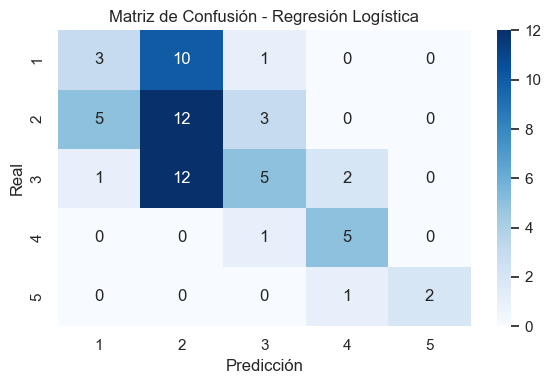

In [24]:
# Visualizar la matriz de confusión como heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión - Regresión Logística")
plt.tight_layout()
plt.show()